#helper functions!

num_of_tests = 10


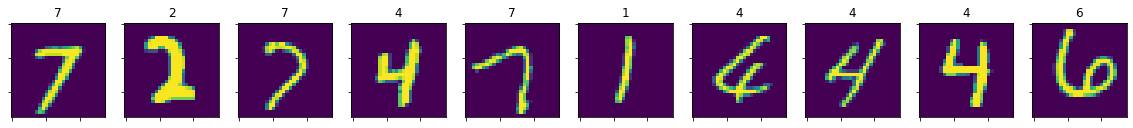

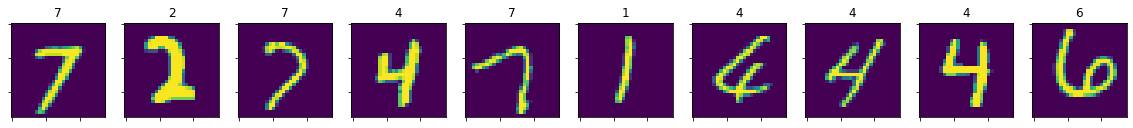

In [2]:
from torchvision.transforms import transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from torchvision import datasets
import  torch

def show_images_return_from_testing(count_of_images):
    testset = datasets.MNIST(root='data/testset', transform=transforms.ToTensor(), download=True)
    testsetloader = torch.utils.data.DataLoader(testset, batch_size=count_of_images, shuffle=True)  #TODO shuffle for
    testing_images, labels = next(iter(testsetloader))
    if count_of_images == 1: num_of_tests = 2
    num_of_tests = testing_images.__len__()
    # fig, axs = plt.subplots(1, num_of_tests,sharey='all')
    size_fig = 15
    num_plots = count_of_images
    if count_of_images == 1: num_plots = 2
    if count_of_images <= 8: size_fig = 150 / count_of_images
    if count_of_images <= 3: size_fig = 5
    if count_of_images > 8: size_fig = 200 / count_of_images
    if count_of_images > 15: size_fig = 300 / count_of_images
    fig, axs = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    fig2, axs2 = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    print(f'{num_of_tests = }')

    for indx in range(num_of_tests):
        axs[indx].set_yticklabels([])  # x-axis
        axs[indx].set_xticklabels([])  # y-axis
        axs[indx].imshow(testing_images[indx, 0, :, :])
        axs[indx].set_title(int(labels[indx]))

    for indx in range(num_of_tests):
        axs2[indx].set_yticklabels([])  # x-axis
        axs2[indx].set_xticklabels([])  # y-axis
        axs2[indx].imshow(testing_images[indx, 0, :, :])
        axs2[indx].set_title(int(labels[indx]))
    return testing_images, labels


# testing_images, labels = show_images_from_testing(10)
_, _ = show_images_return_from_testing(10)


In [3]:
from torchvision.transforms import transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from torchvision import datasets
import torch
from VAE import AE2
from VAE import AE

PATH_VAE = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/weights_training'

model_vae = AE()
model_vae.load_state_dict(torch.load(PATH_VAE))
model_vae.eval()


def show_images_with_model(count_of_images=5, model=model_vae):
    model.eval()
    testset = datasets.MNIST(root='data/testset', transform=transforms.ToTensor(), download=True)
    testsetloader = torch.utils.data.DataLoader(testset, batch_size=count_of_images, shuffle=True)  #TODO shuffle for
    testing_images, labels = next(iter(testsetloader))
    if count_of_images == 1: num_of_tests = 2
    num_of_tests = testing_images.__len__()
    # fig, axs = plt.subplots(1, num_of_tests,sharey='all')
    size_fig = 15
    num_plots = count_of_images
    if count_of_images == 1: num_plots = 2
    if count_of_images <= 8: size_fig = 150 / count_of_images
    if count_of_images <= 3: size_fig = 5
    if count_of_images > 8: size_fig = 200 / count_of_images
    if count_of_images > 15: size_fig = 300 / count_of_images
    fig, axs = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    fig2, axs2 = plt.subplots(1, num_plots, figsize=(size_fig, size_fig))
    print(f'{num_of_tests = }')

    for indx in range(num_of_tests):
        axs[indx].set_yticklabels([])  # x-axis
        axs[indx].set_xticklabels([])  # y-axis
        axs[indx].imshow(testing_images[indx, 0, :, :])
        axs[indx].set_title(int(labels[indx]))

    for indx in range(num_of_tests):
        axs2[indx].set_yticklabels([])  # x-axis
        axs2[indx].set_xticklabels([])  # y-axis
        pred = model(testing_images[indx, 0, :, :])
        axs2[indx].imshow(pred)
        # axs2[indx].imshow(testing_images[indx, 0, :, :])
        axs2[indx].set_title(int(labels[indx]))
    return testing_images, labels


testing_images, labels = show_images_return_from_testing(10)
# _, _ = show_images_return_from_testing(10)
_, _ = show_images_with_model(10,model=model_vae)


RuntimeError: Error(s) in loading state_dict for AE:
	size mismatch for hidden_to_latent.weight: copying a param with shape torch.Size([2, 100]) from checkpoint, the shape in current model is torch.Size([20, 100]).
	size mismatch for hidden_to_latent.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([20]).
	size mismatch for latent_to_image.weight: copying a param with shape torch.Size([784, 2]) from checkpoint, the shape in current model is torch.Size([784, 20]).

Programm

num_of_tests = 10
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.000

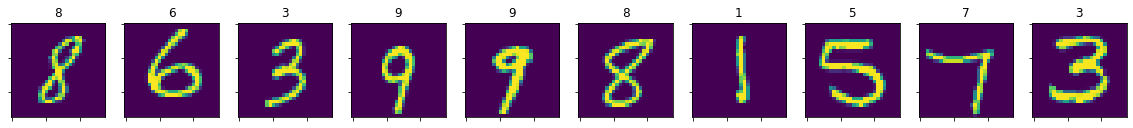

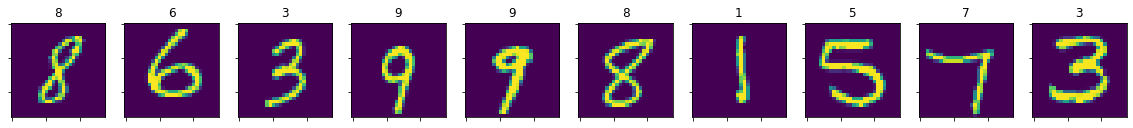

In [13]:
import torch
from VAE import VAE
from VAE import AE_relu
# from VAE import VAE

PATH_VAE = '/Users/dominikocsofszki/PycharmProjects/mlp/data/weights/weights_training'

model_vae = AE_relu()
model_vae.load_state_dict(torch.load(PATH_VAE))
model_vae.eval()
testing_images, labels = show_images_return_from_testing(10)
print(testing_images[0])
testing_images = testing_images /255
#TODO Preproccesing for images needed !!!
print(testing_images[0])
enc = model_vae.encoder(testing_images[0])
dec = model_vae.decoder(enc)
print(f'{enc.shape= }')
print(f'{enc = }')
print(f'{dec.shape  = }')
print(f'{dec  = }')

num_of_tests = 10


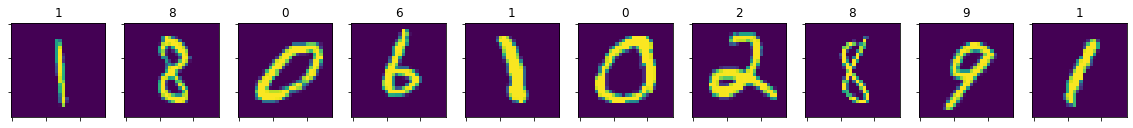

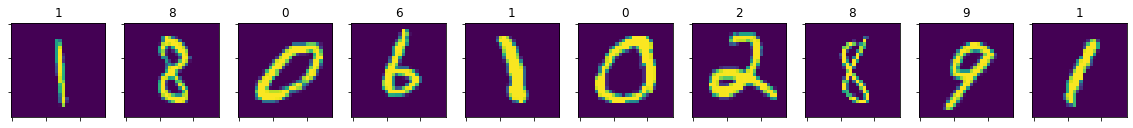

In [282]:
# show_images_return_from_testing
testing_images, labels = show_images_return_from_testing(10)

x = model_vae(testing_images[0])